In [1]:
import sys
sys.path.append('../')
import uniflocpy.uPVT.PVT_fluids as PVT
import matplotlib.pyplot as plt
import numpy as np
import uniflocpy.uPVT.PVT_correlations as PVTcorr
%matplotlib inline

In [2]:
gamma_oil = 809 / 1000 #удельная плотность нефти
gamma_wat = 1020 / 1000 #удельная плотность воды
pbcal_bar = 296 * 1.01325 #атм->бар, давление насыщения

flSt = PVT.FluidStanding(gamma_oil = gamma_oil, gamma_wat = gamma_wat, pbcal_bar = pbcal_bar)
flMc = PVT.FluidMcCain(gamma_oil = gamma_oil, gamma_wat = gamma_wat, pbcal_bar = pbcal_bar)

In [3]:
#Условия, при которых считаем
p = 124 * 1.01325 #атм->бар
t_C = 20

#Вязкость
mu_gas, mu_oil, mu_wat = [], [], []

#Плотность
rho_gas, rho_oil, rho_wat = [], [], []

for fluid in [flSt,flMc]:  
    fluid.calc(p, t_C)
    mu_gas.append(fluid.mu_gas_cp)
    mu_oil.append(fluid.mu_oil_cp)
    mu_wat.append(fluid.mu_wat_cp)
    
    rho_gas.append(fluid.rho_gas_kgm3)
    rho_oil.append(fluid.rho_oil_kgm3)
    rho_wat.append(fluid.rho_wat_kgm3)
    
gas_viscosity_standing = mu_gas[0] 
oil_viscosity_standing = mu_oil[0]
water_viscosity_standing = mu_wat[0] 

gas_density_standing = rho_gas[0]
oil_density_standing = rho_oil[0]
water_density_standing = rho_wat[0]


gas_viscosity_mccain = mu_gas[1] 
oil_viscosity_mccain = mu_oil[1]
water_viscosity_mccain = mu_wat[1] 

gas_density_mccain = rho_gas[1]
oil_density_mccain = rho_oil[1]
water_density_mccain = rho_wat[1]


#Вязкость
print("oil",mu_oil)
print("gas",mu_gas)
print("water",mu_wat)

#Плотность
print("oil",rho_oil)
print("gas",rho_gas)
print("water",rho_wat)

oil [1.163407140444836, 1.0347669324787094]
gas [0.013786253380609242, 0.01396367813189165]
water [0.9826582426274554, 0.9826029221949222]
oil [747.123255251485, 745.1135433973305]
gas [75.85765683052821, 79.24342793424564]
water [1002.2271207836761, 1002.3855220035855]


In [4]:
#Cмесь по Standing
Fluid_Standing = PVT.FluidFlow(fluid = flSt)
Fluid_Standing.qliq_on_surface_m3day = 59 # дебит жидкости
Fluid_Standing.fw_on_surface_perc = 65 #обводненность
Fluid_Standing.d_m = 0.16 #внутренний диаметр 
Fluid_Standing.calc(p, t_C)

mixture_q_standing = Fluid_Standing.q_mix_n_m3day
gas_fraction_standing = Fluid_Standing.qgas_m3day / Fluid_Standing.q_mix_n_m3day
mixture_viscosity_standing = Fluid_Standing.mun_cP
mixture_density_standing = Fluid_Standing.rhon_kgm3

print("q_mix", mixture_q_standing)
print("gas_fraction",gas_fraction_standing)
print("mu_mix", mixture_viscosity_standing)
print("rho_mix", mixture_density_standing)

q_mix 87.8629474562996
gas_fraction 0.29115744302409396
mu_mix 0.7494922974623911
rho_mix 663.4516774106287


In [5]:
#Cмесь считаем по Mccain
Fluid_Mccain = PVT.FluidFlow(fluid = flMc)
Fluid_Mccain.qliq_on_surface_m3day = 59 # дебит жидкости
Fluid_Mccain.fw_on_surface_perc = 65 #обводненность
Fluid_Mccain.d_m =0.16 #внутренний диаметр 
Fluid_Mccain.calc(p, t_C)

mixture_q_mccain = Fluid_Mccain.q_mix_n_m3day
gas_fraction_mccain = Fluid_Mccain.qgas_m3day / Fluid_Mccain.q_mix_n_m3day
mixture_viscosity_mccain = Fluid_Mccain.mun_cP
mixture_density_mccain = Fluid_Mccain.rhon_kgm3

print("q_mix", mixture_q_mccain)
print("gas_fraction",gas_fraction_mccain)
print("mu_mix", mixture_viscosity_mccain)
print("rho_mix", mixture_density_mccain)

q_mix 84.93883915746989
gas_fraction 0.26331055949681165
mu_mix 0.7423339711314485
rho_mix 686.3980816215337


C:\Users\Nat\uniflocpy\uPVT\PVT_fluids.py:655: RuntimeWarning: invalid value encountered in double_scalars
  self.number_pr_n = self.mun_cP * self.heatcapn_jkgc / self.thermal_conductn_wmk
C:\Users\Nat\uniflocpy\uPVT\PVT_fluids.py:521: RuntimeWarning: divide by zero encountered in double_scalars
  return mix_JT_coef_heatcap / self.heatcapn_jkgc


## Сравнение корреляций McCain и Standing

Параметры, полученные путем использования корреляций McCain и Standing, отличаются по значению. Наименьшей относительной погрешностью обладают характеристики, вычисленные для воды.
Наличие погрешностей связано с тем, что корреляционные зависимости выводятся посредством проведения большого количества экспериментов, и, как следствие, полученные выражения для параметров флюида привязаны к определенному географическому региону, на основе данных которого была получена зависимость. Также на точность могут влиять все погрешности, неизбежно сопровождающие экспериментальные исследования. 

In [6]:
#Задание 2 
#Определить забойное давление в скважине. Фонтанирует ли? Построить vlp кривую 0-500м3/сут
from multiprocessing import Pool
import uniflocpy.uWell.mp_test as mp_test
import uniflocpy.uWell.Self_flow_well as self_flow_well


In [7]:
well_data = {
"gamma_oil" : gamma_oil,
"gamma_wat" : gamma_wat,
    
"h_intake_mes_m" : 2607.05, #H сп - глубина спуска насоса     
"h_intake_vert_m": 2607.05, #-0  удлинение на глубине спуска, отсутствует    
"h_bottomhole_mes_m" :3774,   #Hвдп; глубина текущего забоя 2698, можно взять глубину до дыр перфорации   
"h_bottomhole_vert_m" :3774 - 744, #Hвдп - Удл    
"qliq_on_surface_m3day": 59,
"fw_on_surface_perc": 65,     
"d_casing_inner_m" : 0.16,   
"d_tube_inner_m" : 0.089 - 0.005,    
'p_bottomhole_bar':218 * 1.01325, #Pзаб замеренное
"p_wellhead_bar" : p,  
"t_wellhead_c" : t_C,  
    
"step_lenth_in_calc_along_wellbore_m":50,
                "without_annulus_space":False,
"fluid":1, 
"reservoir":0,
"pipe":0,
"temp_corr":1,
"solver_using":1}



In [8]:
amount_of_threads = 5
def create_data_to_mp(parameter_name_to_fill, parameter_values_to_fill, 
                      parameter_name_to_iterate="qliq_on_surface_m3day",
                      parameter_name_to_extract='p_bottomhole_bar',
                      well_data=well_data, 
                      amount_of_threads=amount_of_threads, defined_range=range(0, 500, 15)):
    to_mp = []
    for i,j in zip(range(amount_of_threads), parameter_values_to_fill):
        this_well_data = well_data.copy()
        this_well_data[parameter_name_to_fill] = j
        data = [self_flow_well.self_flow_well, this_well_data,defined_range , parameter_name_to_iterate,
                                     parameter_name_to_extract, parameter_name_to_fill, j]
        to_mp.append(data)
    return to_mp

def run_calculation(to_mp, func = mp_test.calc_well_with_one_parameter, amount_of_threads=amount_of_threads):
    if __name__ == '__main__':
        with Pool(amount_of_threads) as p:
            result = p.map(func, to_mp)
            
    result_df  = None
    for i in result:
        try:
            result_df = result_df.join(i, how = 'outer')
        except:
            result_df = i.copy()
    return result_df

In [9]:
#Определение забойной давления
to_mp = create_data_to_mp("gamma_oil", [gamma_oil], defined_range = np.linspace(59,59,1))
result = run_calculation(to_mp)
print(result)
p_wf = result.to_numpy()[0,0]
print(p_wf)

                       p_bottomhole_bar при gamma_oil = 0.809
qliq_on_surface_m3day                                        
59.0                                                380.93473
380.9347296538447


## Фонтанирует ли скважина?
Сделаем оценку возможности фонтанирования скважины, используя следующие 
предоположения:
- смесь - идеальная жидкость
- течение стационарное и баротропное 


Тогда воспользуемся интегралом Бернулли, значение которого сохраняется вдоль линии тока. Опишем два состояния: на глубине забоя и на поверхности.
$$ p_{wf}= \rho g z + \frac{\rho V ^ {2}}{2} + p_{buf}$$
Или
$$ p_{wf} - p_{buf}= \rho g z + \frac{\rho V ^ {2}}{2}$$
Таким образом, в данной постановке перепад давления расходуется на преодоление сил тяжести и на движение жидкости со скоростью V . Из представленных соотношений можем получить грубую оценку скорости движения смеси.


In [10]:
delta_p = (p_wf - p)*10**5 #Перапад давления, Па
v = np.sqrt(2 / mixture_density_mccain * (delta_p - mixture_density_mccain * 9.8 *
                                  well_data["h_bottomhole_vert_m"]))
print(v*3600/1000, "км/ч")

440.87743618152814 км/ч


Скорость рассматриваемой идеальной жидкости составляет 440.8 км/ч, это говорит о том, что на устье смесь обладает большой энергией, способна продолжить преодолевать силу тяжести, следовательно, скважина фонтанирует.

In [11]:
#Построение vlp кривой в диапазоне 0-500 м3/сут
q_liq_vlp = np.linspace(0.001,500,10)
to_mp = create_data_to_mp("gamma_oil", [gamma_oil], defined_range = q_liq_vlp)
result = run_calculation(to_mp)
p_wf_vlp = result.to_numpy()[:,0]
result

,p_bottomhole_bar при gamma_oil = 0.809
qliq_on_surface_m3day,
0.001000,382.274074
55.556444,381.100998
111.111889,376.928472
166.667333,376.206927
222.222778,376.599086
277.778222,377.275728
333.333667,379.865122
388.889111,382.787939
444.444556,384.231999


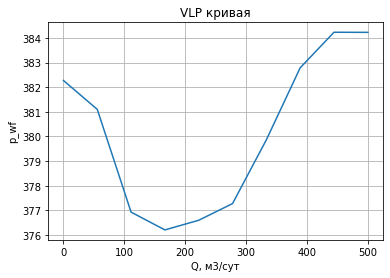

In [12]:
plt.title("VLP кривая")
plt.ylabel("p_wf")
plt.xlabel("Q, м3/сут")
plt.plot(q_liq_vlp, p_wf_vlp)
plt.grid()

## VLP - кривая
Отражает зависимость забойного давления от дебита скважины с учетом PVT-свойств, параметров скважины, обводненности, газового фактора. Показывает, сколько флюида может доставить на поверхность данная скважина.

In [1]:
#Задание 3
# # подготовимся к импорту API который находится в родительской папке относительно этой тетрадки
# import sys
# sys.path.insert(0,'..')
# import pandas as pd
# # импортируем api
# import unifloc_vba.unifloc_vba_python_api.python_api as python_api 
# В python_api очень много синтаксический ошибок

# UniflocVBA = python_api.API("unifloc_vba/UniflocVBA_7.xlam")
# print("import excel with unifloc vba done. version " + UniflocVBA.unf_version())

In [2]:
# help(UniflocVBA.MF_p_pipeline_atma)

In [3]:
# pvt_str_data = {"gamma_gas":0.6,
# "gamma_oil":0.86,
# "gamma_wat":1,
# "rsb_m3m3":100,
# "rp_m3m3":-1,
# "pb_atma":-1,
# "t_res_C":90,
# "bob_m3m3":-1,
# "muob_cP":-1,
# "PVTcorr":0,
# "ksep_fr":0,
# "p_ksep_atma":-1,
# "t_ksep_C":-1,
# "gas_only":False
#                }

In [4]:
# pipeline_data = {"p_calc_from_atma": 20,
# "t_calc_from_C": 20,
# "t_val":40,
# "h_list_m" : 2000,
# "diam_list_mm" : 50,
# "qliq_sm3day" : 100,
# "fw_perc":25,
# "q_gas_sm3day":0,
# "str_PVT":UniflocVBA.PVT_encode_string(**pvt_str_data),
# "calc_flow_direction":10,
# "hydr_corr":0,
# "temp_method":1,
# "c_calibr":1,
# "roughness_m":0.0001,
# "out_curves":0,
# "out_curves_num_points":2}

In [18]:
#Cделано в excel (task2_3.xlsm)
h = [0,199,397,596,795,993,1192,1390,1589,1788,1986,2185,2384,2582,2781,2979,3178,3377,3575,3774]
flow_pattern = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [1]:
#Запись результата в файл
import json,codecs
result = {"ex1": {"gas_fraction_standing": gas_fraction_standing,
                  "q_mix_standing":mixture_q_standing, 
                  "gas_viscosity_standing":gas_viscosity_standing,
                  "gas_density_standing":gas_density_standing,
                  "water_viscosity_standing":water_viscosity_standing,
                  "water_density_standing":water_density_standing,
                  "oil_viscosity_standing":oil_viscosity_standing,
                  "oil_density_standing":oil_density_standing,
                  "mixture_viscosity_standing":mixture_viscosity_standing,
                  "mixture_density_standing":mixture_density_standing,
                  "gas_fraction_mccain":gas_fraction_mccain,
                  "q_mix_mccain":mixture_q_mccain,
                  "gas_viscosity_mccain":gas_viscosity_mccain,
                  "gas_density_mccain":gas_density_mccain,
                  "water_viscosity_mccain":water_viscosity_mccain,
                  "water_density_mccain":water_density_mccain,
                  "oil_viscosity_mccain":oil_viscosity_mccain,
                  "oil_density_mccain":oil_density_mccain,
                  "mixture_viscosity_mccain":mixture_viscosity_mccain,
                  "mixture_density_mccain":mixture_density_mccain},
          "ex2":{"p_wf":p_wf,
                  "q_liq_vlp":list(q_liq_vlp),
                  "p_wf_vlp": list(p_wf_vlp)},
          "ex3": {"h":h,"flow_pattern":flow_pattern}
          }
with open('result2.json', 'wb') as f:
    json.dump(result, codecs.getwriter('utf-8')(f), ensure_ascii=False)


NameError: name 'gas_fraction_standing' is not defined